In [1]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import csv
data=pd.read_csv('/Users/sezin/PycharmProjects/Per-Title_encoding/Data/clip_encode_merged_data.csv')

In [3]:
data.head()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,video_profile,clip_frame_rate,crf,encode_bitrate_video,psnr,vmaf
0,7,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,18,18667784,44.621550,99.406406
1,8,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,19,16379868,44.051502,99.192502
2,9,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,20,14293883,43.408926,98.924590
3,10,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,27,3985062,38.802828,89.462670
4,11,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,29,2969404,37.790129,84.728349


In [4]:
data.describe()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,psnr,vmaf
count,4151.000000,4151.000000,4151.000000,4151.000000,4151.0,4151.000000,4151.000000,4.151000e+03,4.151000e+03,4151.000000,4.151000e+03,2435.000000,2606.000000
mean,3329.403035,32.957841,825.142857,524.571429,1920.0,967.244519,112.893761,1.540482e+08,2.275095e+07,32.733558,9.413673e+05,32.554520,47.881850
std,2216.132777,21.439417,534.423119,269.257172,0.0,127.595081,76.100023,7.462038e+07,3.563828e+07,10.395821,2.096332e+06,6.053601,28.802761
min,7.000000,5.000000,320.000000,240.000000,1920.0,816.000000,19.000000,2.377966e+07,1.753107e+06,18.000000,6.628000e+03,19.659002,0.065712
25%,1044.500000,12.000000,384.000000,288.000000,1920.0,816.000000,19.000000,1.015332e+08,9.569707e+06,23.000000,9.719850e+04,27.757793,22.493813
50%,3636.000000,34.000000,640.000000,480.000000,1920.0,1056.000000,131.000000,1.612013e+08,9.649357e+06,31.000000,2.908740e+05,32.449909,48.432191
75%,4785.500000,44.000000,1280.000000,720.000000,1920.0,1080.000000,149.000000,1.791551e+08,1.237013e+07,40.000000,8.473455e+05,36.780884,72.662840
max,8099.000000,88.000000,1920.000000,1080.000000,1920.0,1080.000000,463.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,49.104119,99.406406


In [5]:
#check if there are null values
data.isnull().sum()

encode_id                  0
clip_id                    0
encode_width               0
encode_height              0
clip_width                 0
clip_height                0
clip_duration              0
clip_size                  0
clip_bitrate_total         0
video_profile              0
clip_frame_rate            0
crf                        0
encode_bitrate_video       0
psnr                    1716
vmaf                    1545
dtype: int64

In [6]:
#drop rows
#here I simply dropped the null values and ofcourse lost some info. Later I will try to ampute data with mean.
data=data.dropna()

In [7]:
data.describe()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,psnr,vmaf
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.0,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2.384000e+03,2384.000000,2384.000000
mean,1894.543624,19.524748,835.006711,529.912752,1920.0,965.456376,77.847315,1.519939e+08,3.330829e+07,32.492869,1.104493e+06,32.656632,47.524730
std,1405.902618,11.559849,535.952503,269.646340,0.0,128.782855,57.074284,9.087968e+07,4.410095e+07,10.401384,2.506750e+06,6.067974,28.979560
min,7.000000,5.000000,320.000000,240.000000,1920.0,816.000000,19.000000,2.377966e+07,9.017049e+06,18.000000,6.743000e+03,19.659002,0.065712
25%,653.750000,9.000000,384.000000,288.000000,1920.0,816.000000,19.000000,9.352000e+07,9.609672e+06,23.000000,1.081065e+05,27.836386,21.619999
50%,1382.500000,15.000000,640.000000,480.000000,1920.0,1056.000000,78.000000,1.457467e+08,1.000248e+07,31.000000,3.316335e+05,32.649125,47.651743
75%,3399.250000,32.000000,1280.000000,720.000000,1920.0,1080.000000,141.000000,1.795460e+08,2.106653e+07,40.000000,9.532675e+05,36.853550,72.692655
max,4107.000000,38.000000,1920.000000,1080.000000,1920.0,1080.000000,182.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,49.104119,99.406406


In [8]:
data.shape

(2384, 15)

In [9]:
#data.to_csv('/Users/sezin/PycharmProjects/Per-Title_encoding/Data/clip_encode_merged_data_wo_null.csv')

In [11]:
#drop ids and psnr column
new_data = data.drop(columns=['encode_id', 'clip_id', 'psnr','video_profile','clip_frame_rate'])
new_data.describe()

,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,vmaf
count,2384.000000,2384.000000,2384.0,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2.384000e+03,2384.000000
mean,835.006711,529.912752,1920.0,965.456376,77.847315,1.519939e+08,3.330829e+07,32.492869,1.104493e+06,47.524730
std,535.952503,269.646340,0.0,128.782855,57.074284,9.087968e+07,4.410095e+07,10.401384,2.506750e+06,28.979560
min,320.000000,240.000000,1920.0,816.000000,19.000000,2.377966e+07,9.017049e+06,18.000000,6.743000e+03,0.065712
25%,384.000000,288.000000,1920.0,816.000000,19.000000,9.352000e+07,9.609672e+06,23.000000,1.081065e+05,21.619999
50%,640.000000,480.000000,1920.0,1056.000000,78.000000,1.457467e+08,1.000248e+07,31.000000,3.316335e+05,47.651743
75%,1280.000000,720.000000,1920.0,1080.000000,141.000000,1.795460e+08,2.106653e+07,40.000000,9.532675e+05,72.692655
max,1920.000000,1080.000000,1920.0,1080.000000,182.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,99.406406


In [12]:
#train test split
e_train, e_test = train_test_split(new_data, test_size=0.2)
print(e_train.shape,e_test.shape)

(1907, 10) (477, 10)


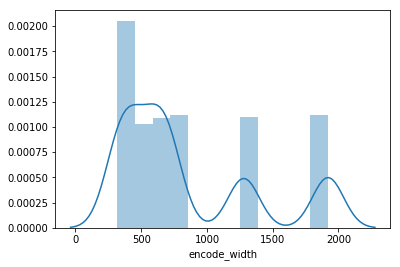

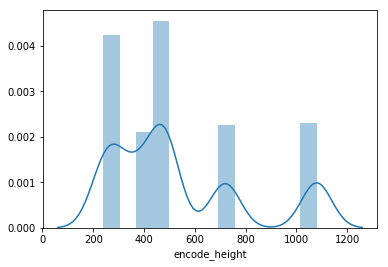

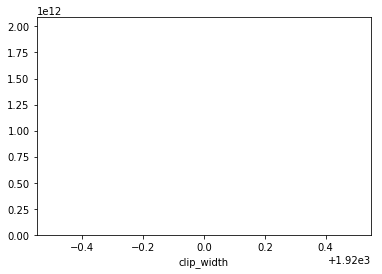

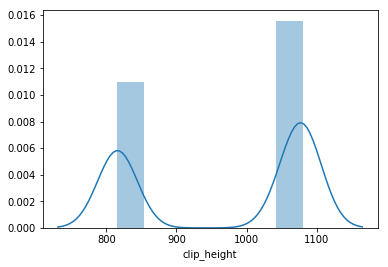

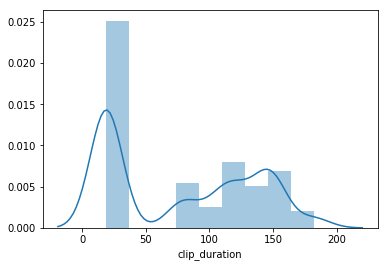

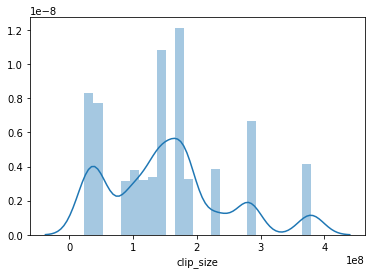

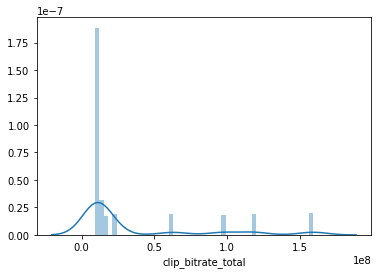

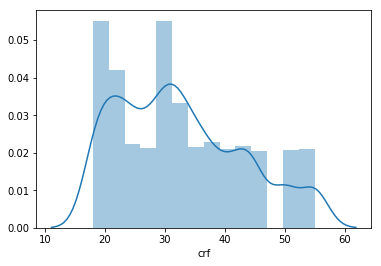

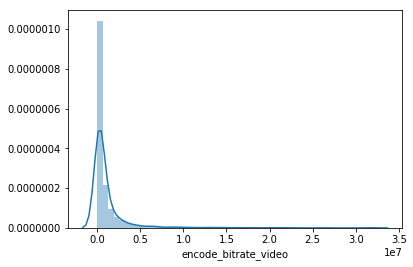

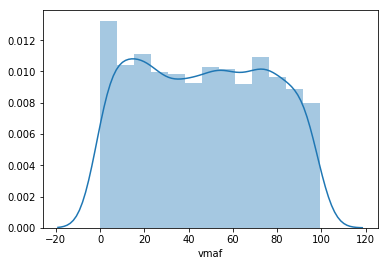

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in list(e_train):
    #plt.hist(e_train[column])
    sns.distplot(e_train[column])
    plt.show()

In [14]:
print(e_test.describe())

       encode_width  encode_height  clip_width  clip_height  clip_duration  \
count    477.000000     477.000000       477.0   477.000000     477.000000   
mean     815.631027     520.654088      1920.0   952.251572      80.308176   
std      524.558556     263.567206         0.0   130.131687      55.671563   
min      320.000000     240.000000      1920.0   816.000000      19.000000   
25%      384.000000     288.000000      1920.0   816.000000      19.000000   
50%      640.000000     480.000000      1920.0  1056.000000      81.000000   
75%     1280.000000     720.000000      1920.0  1080.000000     141.000000   
max     1920.000000    1080.000000      1920.0  1080.000000     182.000000   

          clip_size  clip_bitrate_total         crf  encode_bitrate_video  \
count  4.770000e+02        4.770000e+02  477.000000          4.770000e+02   
mean   1.485976e+08        3.084624e+07   31.867925          1.087212e+06   
std    8.475661e+07        4.151974e+07   10.375784          2.377

In [15]:
print(e_train.describe())

       encode_width  encode_height  clip_width  clip_height  clip_duration  \
count   1907.000000    1907.000000      1907.0  1907.000000    1907.000000   
mean     839.853173     532.228631      1920.0   968.759308      77.231778   
std      538.791259     271.164149         0.0   128.265179      57.417634   
min      320.000000     240.000000      1920.0   816.000000      19.000000   
25%      384.000000     288.000000      1920.0   816.000000      19.000000   
50%      640.000000     480.000000      1920.0  1056.000000      78.000000   
75%     1280.000000     720.000000      1920.0  1080.000000     141.000000   
max     1920.000000    1080.000000      1920.0  1080.000000     182.000000   

          clip_size  clip_bitrate_total          crf  encode_bitrate_video  \
count  1.907000e+03        1.907000e+03  1907.000000          1.907000e+03   
mean   1.528434e+08        3.392413e+07    32.649187          1.108816e+06   
std    9.234943e+07        4.471254e+07    10.404624          2

### Test Model

In [17]:
data_y_train = e_train['vmaf']
data_X_train = e_train.drop(columns=['vmaf'])


data_y_test = e_test['vmaf']
data_X_test = e_test.drop(columns=['vmaf'])

In [18]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(data_X_train, data_y_train)
print(linear_regression_model.coef_)

[-3.39635893e-02  1.24957631e-01 -3.39949281e-11 -2.28921118e-02
  5.20221895e-01 -3.97602048e-07  8.98872632e-07 -2.06865429e+00
  1.85064926e-07]


In [23]:
y_pred = linear_regression_model.predict(data_X_test)

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(data_y_test, y_pred)

7.457265902103644

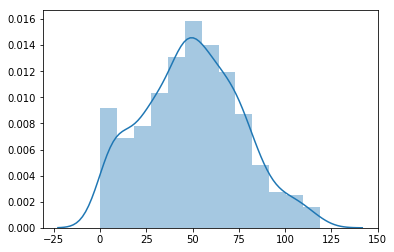

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(abs(y_pred))
plt.show()